# 5章 モデルの評価と改良

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x, y = make_blobs(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

logreg = LogisticRegression().fit(x_train, y_train)
print("Test set score: {:.2f}".format(logreg.score(x_test, y_test)))

Test set score: 0.88


## 5.1 交差検証

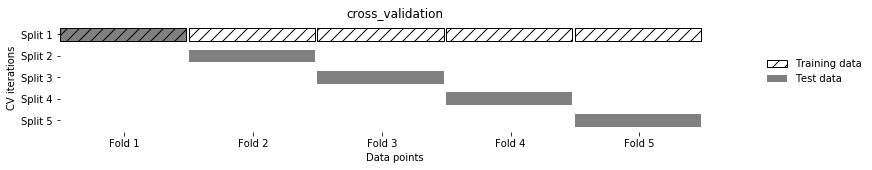

In [5]:
%matplotlib inline

import mglearn
import matplotlib.pyplot as plt
import numpy as np

# mglearn.plots.plot_cross_validation()

def plot_cross_validation():
    plt.figure(figsize=(12, 2))
    plt.title("cross_validation")
    axes = plt.gca()
    axes.set_frame_on(False)

    n_folds = 5
    n_samples = 25

    n_samples_per_fold = n_samples / float(n_folds)

    for i in range(n_folds):
        colors = ["w"] * n_folds
        colors[i] = "grey"
        bars = plt.barh(
            y=range(n_folds), width=[n_samples_per_fold - 0.1] * n_folds,
            left=i * n_samples_per_fold, height=.6, color=colors, hatch="//",
            edgecolor='k', align='edge')
    axes.invert_yaxis()
    axes.set_xlim(0, n_samples + 1)
    plt.ylabel("CV iterations")
    plt.xlabel("Data points")
    plt.xticks(np.arange(n_samples_per_fold / 2., n_samples,
                         n_samples_per_fold),
               ["Fold %d" % x for x in range(1, n_folds + 1)])
    plt.yticks(np.arange(n_folds) + .3,
               ["Split %d" % x for x in range(1, n_folds + 1)])
    plt.legend([bars[0], bars[4]], ['Training data', 'Test data'],
               loc=(1.05, 0.4), frameon=False)
    
plot_cross_validation()

### 5.1.1 scikit-learnでの交差検証

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


In [7]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [8]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### 5.1.2 交差検証の利点
### 5.1.3 層化k分割交差検証と他の戦略

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/

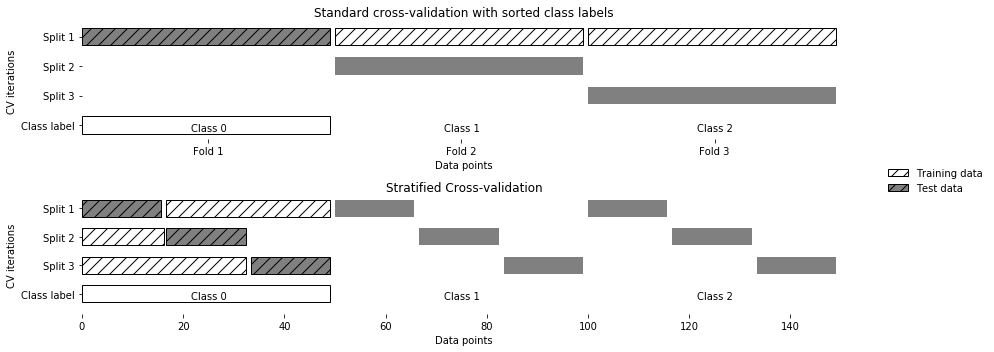

In [10]:
mglearn.plots.plot_stratified_cross_validation()

#### 5.1.3.1 交差検証のより詳細な制御

In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [12]:
kfold = KFold(n_splits=3)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


In [13]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.9   0.96  0.96]


#### 5.1.3.2 1つ抜き交差検証

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### 5.1.3.3 シャッフル分割交差検証

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


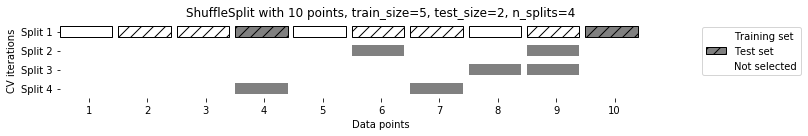

In [16]:
mglearn.plots.plot_shuffle_split()

In [19]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.90666667  0.97333333  0.98666667  0.85333333  0.94666667  0.97333333
  0.92        0.94666667  0.92        0.98666667]


#### 5.1.3.4 グループ付き交差検証

In [21]:
from sklearn.model_selection import GroupKFold

x, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, x, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/mglearn/plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


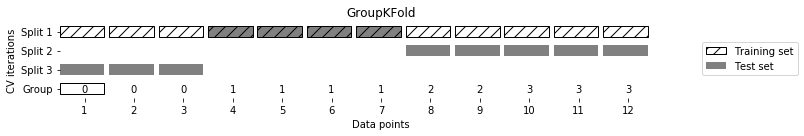

In [23]:
mglearn.plots.plot_group_kfold()

## 5.2 グリッドサーチ
### 5.2.1 単純なグリッドサーチ

In [25]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print("Size of training set: {}\nsize of test set: {}".format(x_train.shape[0], x_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=c)
        svm.fit(x_train, y_train)
        score = svm.score(x_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C": c, "gamma": gamma}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112
size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 パラメータの過剰適合の危険性と検証セット

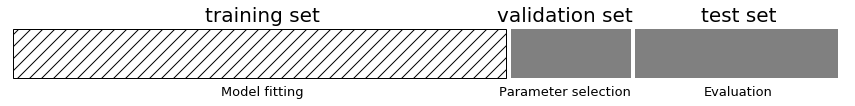

In [28]:
mglearn.plots.plot_threefold_split()

In [29]:
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, random_state=1)

print("Size of training set: {}\nsize of validation set: {}\nsize of test set: {}".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

Size of training set: 84
size of validation set: 28
size of test set: 38


In [30]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=c)
        svm.fit(x_train, y_train)
        score = svm.score(x_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {"C": c, "gamma": gamma}
            
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
            
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [31]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=c)
        scores = cross_val_score(svm, x_trainval, y_trainval, cv=5)
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_parameters = {"C": c, "gamma": gamma}
            
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_test, y_test)
            
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.97
Best parameters: {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.97


/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=Tru

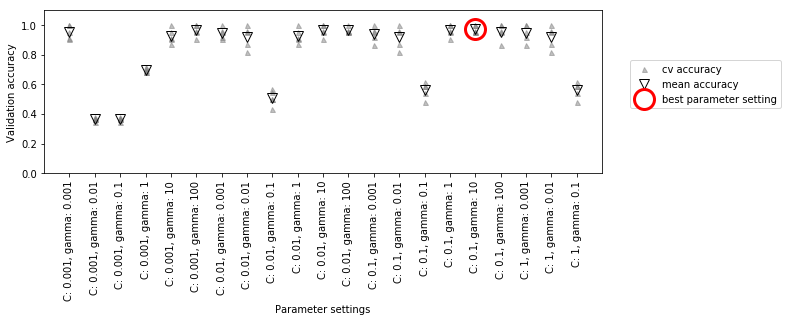

In [32]:
mglearn.plots.plot_cross_val_selection()

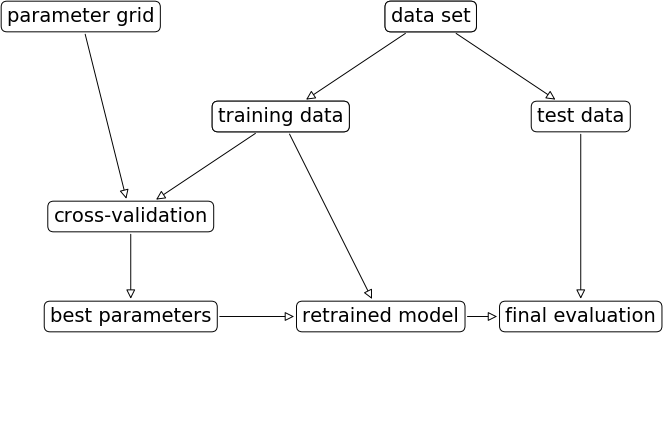

In [34]:
mglearn.plots.plot_grid_search_overview()

In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid: \n{}".format(param_grid))

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(x_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))

Test set score: 0.97


In [38]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [39]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### 5.2.3.1 交差検証の結果の解析

In [40]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=Tru

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000726,0.000252,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000122,0.000018,0.011371,0.002852
1,0.000551,0.000241,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000023,0.000042,0.011371,0.002852
2,0.000669,0.000295,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000101,0.000043,0.011371,0.002852
3,0.000548,0.000225,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000017,0.000008,0.011371,0.002852
4,0.000641,0.000238,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000064,0.000031,0.011371,0.002852


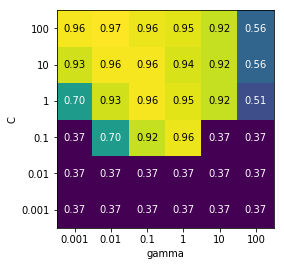

In [42]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel="gamma", xticklabels=param_grid["gamma"], ylabel="C", yticklabels=param_grid["C"], cmap="viridis")

#### 5.2.3.2 グリッドでないサーチ空間

In [43]:
param_grid = [{"kernel": ["rbf"], "C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]},
             {"kernel": ["linear"], "C": [0.001, 0.01, 0.1, 1, 10, 100]}]

print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [44]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(x_test, y_test)))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97
Test set score: 0.97


In [47]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/nownabe/.anyenv/envs/pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=Tru

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000730,0.000237,0.366071,0.366079,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000297,0.000027,0.011371,0.002852
1,0.000592,0.000253,0.366071,0.366079,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000037,0.000028,0.011371,0.002852
2,0.000660,0.000279,0.366071,0.366079,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000064,0.000048,0.011371,0.002852
3,0.000599,0.000231,0.366071,0.366079,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000062,0.000016,0.011371,0.002852
4,0.000591,0.000242,0.366071,0.366079,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000039,0.000041,0.011371,0.002852
5,0.000593,0.000243,0.366071,0.366079,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000073,0.000031,0.011371,0.002852
6,0.000597,0.000255,0.366071,0.366079,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000050,0.000031,0.011371,0.002852
7,0.000592,0.000237,0.366071,0.366079,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000057,0.000017,0.011371,0.002852
8,0.000799,0.000284,0.366071,0.366079,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000350,0.000048,0.011371,0.002852
9,0.000669,0.000282,0.366071,0.366079,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",27,0.375000,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000051,0.000043,0.011371,0.002852


#### 5.2.3.3 異なる交差検証手法を用いたグリッドサーチ
#### 5.2.3.4 ネストした交差検証

In [48]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.9         0.96666667  1.        ]
Mean cross-validation score:  0.966666666667


In [50]:
def nested_cv(x, y, inner_cv, outer_cv, classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(x, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(x[training_samples], y[training_samples]):
                clf = classifier(**parameters)
                clf.fit(x[inner_train], y[inner_train])
                score = clf.score(x[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = classifier(**best_params)
        clf.fit(x[training_samples], y[training_samples])
        outer_scores.append(clf.score(x[test_samples], y[test_samples]))
    return np.array(outer_scores)

from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
